In [1]:
from pathlib import Path
import os

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
from machine_perception.datasets.MOSE_SAM_dataset import MOSE_SAM_Dataset
from ultralytics import YOLO

In [3]:
model = YOLO("yolo11x-seg.pt")

100%|██████████| 119M/119M [00:13<00:00, 9.25MB/s] 


In [4]:
DATA_DIR = Path().resolve().parents[3] / "data"

mose_sam_test_dataset = MOSE_SAM_Dataset(
    root=DATA_DIR / "train",
    meta_file=DATA_DIR / "meta_test_split.json",
)

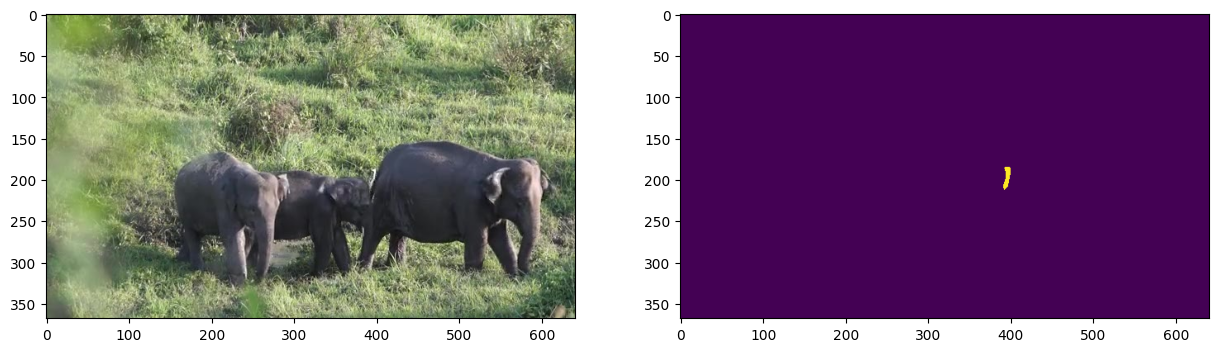

In [22]:
sample = mose_sam_test_dataset[300]["video_frames"]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
frame = 0
axs[0].imshow(sample[frame]["image"])
axs[1].imshow(sample[frame]["label"])

In [23]:
result_frames = []
for i in range(len(sample)):
    frame = sample[i]["image"]
    result = model.track(np.ascontiguousarray(frame))[0]
    result_frames.append(result.plot())

0: 384x640 3 elephants, 394.4ms
Speed: 4.4ms preprocess, 394.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 elephants, 56.1ms
Speed: 1.5ms preprocess, 56.1ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 elephants, 49.2ms
Speed: 1.6ms preprocess, 49.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 elephants, 50.7ms
Speed: 1.8ms preprocess, 50.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 elephants, 52.0ms
Speed: 1.8ms preprocess, 52.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 elephants, 50.2ms
Speed: 1.8ms preprocess, 50.2ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 elephants, 49.6ms
Speed: 1.8ms preprocess, 49.6ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 elephants, 49.8ms
Speed: 1.2ms preprocess, 49.8ms inference, 5.3ms postprocess per

In [18]:
def frames_to_video(
    frames: list[np.ndarray] | np.ndarray, output_file: str | Path, frame_rate: int = 30
):
    if len(frames) == 0:
        raise ValueError("frames are empty")
    frame_size = (frames[0].shape[1], frames[0].shape[0])
    fourcc = cv2.VideoWriter_fourcc(*"MJPG")
    out = cv2.VideoWriter(output_file, fourcc, frame_rate, frame_size)

    for frame in frames:
        out.write(frame[:, :, [2, 1, 0]])
    out.release()

In [24]:
frames_to_video(result_frames, "elephants.avi", frame_rate=5)

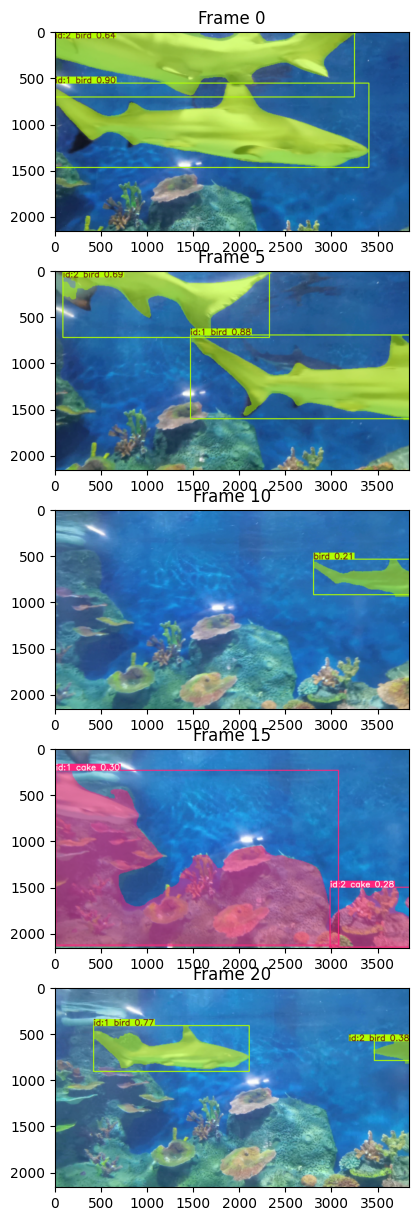

In [82]:
frames_idxs = [0, 5, 10, 15, 20]

fig, axs = plt.subplots(len(frames_idxs), 1, figsize=(5 * len(frames_idxs), 15))
for ax, frame_idx in zip(axs, frames_idxs):
    ax.imshow(result_frames[frame_idx])
    ax.set_title(f"Frame {frame_idx}")

In [69]:
frame = sample[30]["image"]
result = model.track(np.ascontiguousarray(frame))


0: 384x640 1 airplane, 13.1ms
Speed: 194.3ms preprocess, 13.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
